<a href="https://colab.research.google.com/github/Nyota-Lab/movies/blob/Features/Dise%C3%B1o_de_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import warnings
#warnings.simplefilter("ignore")

#Diseño de Features
* Primero cargamos las librerias a utilizar

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

* No todos los tipos de regresion tienen la misma facilidad para ser interpretados
* Procedemos a cargar nuestro dataframe

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = ('/content/drive/My Drive/Peliculas/x.csv')
X = pd.read_csv('/content/drive/My Drive/Peliculas/x.csv')

* Volvemos a generar los conjuntos de entrenamiento y de practica
* En este caso el drop lo realizamos con worldwide_gross y gross ya que pueden generar problemas de rendimiento en el modelo

In [4]:
#x = pd.read_csv(r'C:\Users\willi\Documents\Programacion\ML\x.csv')
y = X['worldwide_gross']
X = X.drop(['worldwide_gross','gross'], axis=1)
X

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5
...,...,...,...,...,...,...,...
4099,7000.0,2004.000000,1.850000,77.000000,368.0,7.000000e+03,7.0
4100,7000.0,2005.000000,2.126976,80.000000,0.0,7.000000e+03,6.3
4101,7000.0,2005.000000,2.126976,84.000000,93.0,3.250000e+03,7.8
4102,3967.0,2012.000000,2.350000,100.000000,2386.0,4.045539e+07,6.3


* Instanciamos nuevamente nuestro modelo de regresion lineal

In [0]:
from sklearn.linear_model import Lasso
model = Lasso()

* Dividimos nuevamente nuestro dataset en los conjuntos de test y train
* Por defecto siempre la division se hace al 75%

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

* Volvemos a entrenar nuestro modelo de regresion lineal

In [7]:
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

* Evaluemos el desempeño de nuestro modelo a través de su R2

In [8]:
model.score(X_test,y_test)

0.5794938105985779

* Vamos a usar model.coef_ para identificar los parametros por los cuales se han multiplicado las features en la regresion lineal.
* Poner _ al final de una palabra clave es la convencion para identificar atributos dentro de sklearn

In [9]:
model.coef_

array([ 3.12194046e+00, -9.34963391e+04, -5.51385725e+06, -5.27307999e+04,
        2.71362558e+02, -9.06204361e-03,  2.72069660e+07])

* Como los valores están en diferentes dimensiones e incluso hay algunos negativos vamos a usar las posibilidades de numpy para poder visualizarlos de mejor manera
  * np.floor() nos dá sólo la parte entera de un número
  * np.log10() transforma el numero al logaritmo en base 10 para poder establecer una sola dimension para los valores
  * np.abs() nos entrega el valor absoluto

In [10]:
var = np.floor(np.log10(np.abs(model.coef_)))
var

array([ 0.,  4.,  6.,  4.,  2., -3.,  7.])

* Para poder tener una mejor comprension de estos parámetros los vamos a graficar

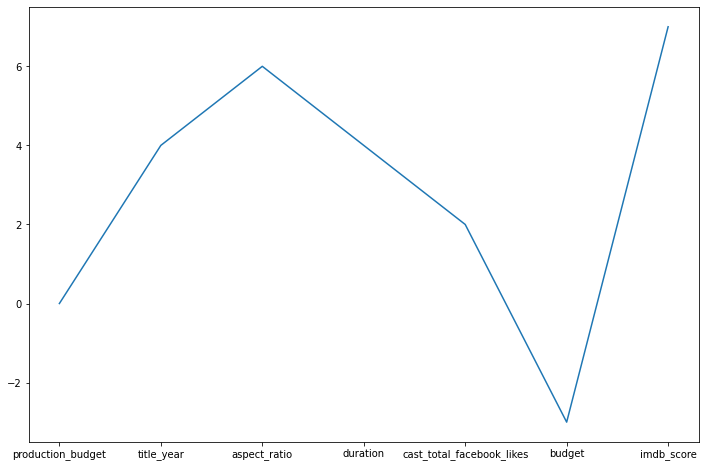

In [11]:
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(var)
plt.xticks(np.arange(7),list(X.columns));

* Entonces podemos ver que hay features muy importantes y otras que no tanto por lo cual en nuestro dataframe hay que hacer algunas precisiones que no solo vienen de los parametros.
* Es importante no solo dejarse llevar por los graficos directamente pues es necesario notar que por ejemplo aspect_ratio parece ser una feature importante en la práctica no influye directamente en el nivel de ingresos obtenido
* Para este caso budget no parece ser una de las mas importantes


* Generamos el grafico de cada uno de las features a través de Seaborn para tener una vista mas detallada de la relacion entre las features
* Con este grafico podemos tener una mejor idea de como influyen las features entre sí, por ejemplo aspect_ratio se aleja mucho de la diagonal por lo cual nos indica que su "peso" no es tan significativo
* Por otro lado tenems una relacion interesante con el año de la película pero esto no tiene mucha influenca en el modelo real ya que tratamos de averiguar el ingreso de películas a lanzarse
* podemos notar que las relaciones mas fuertes se dan con production_budget e imbd_score

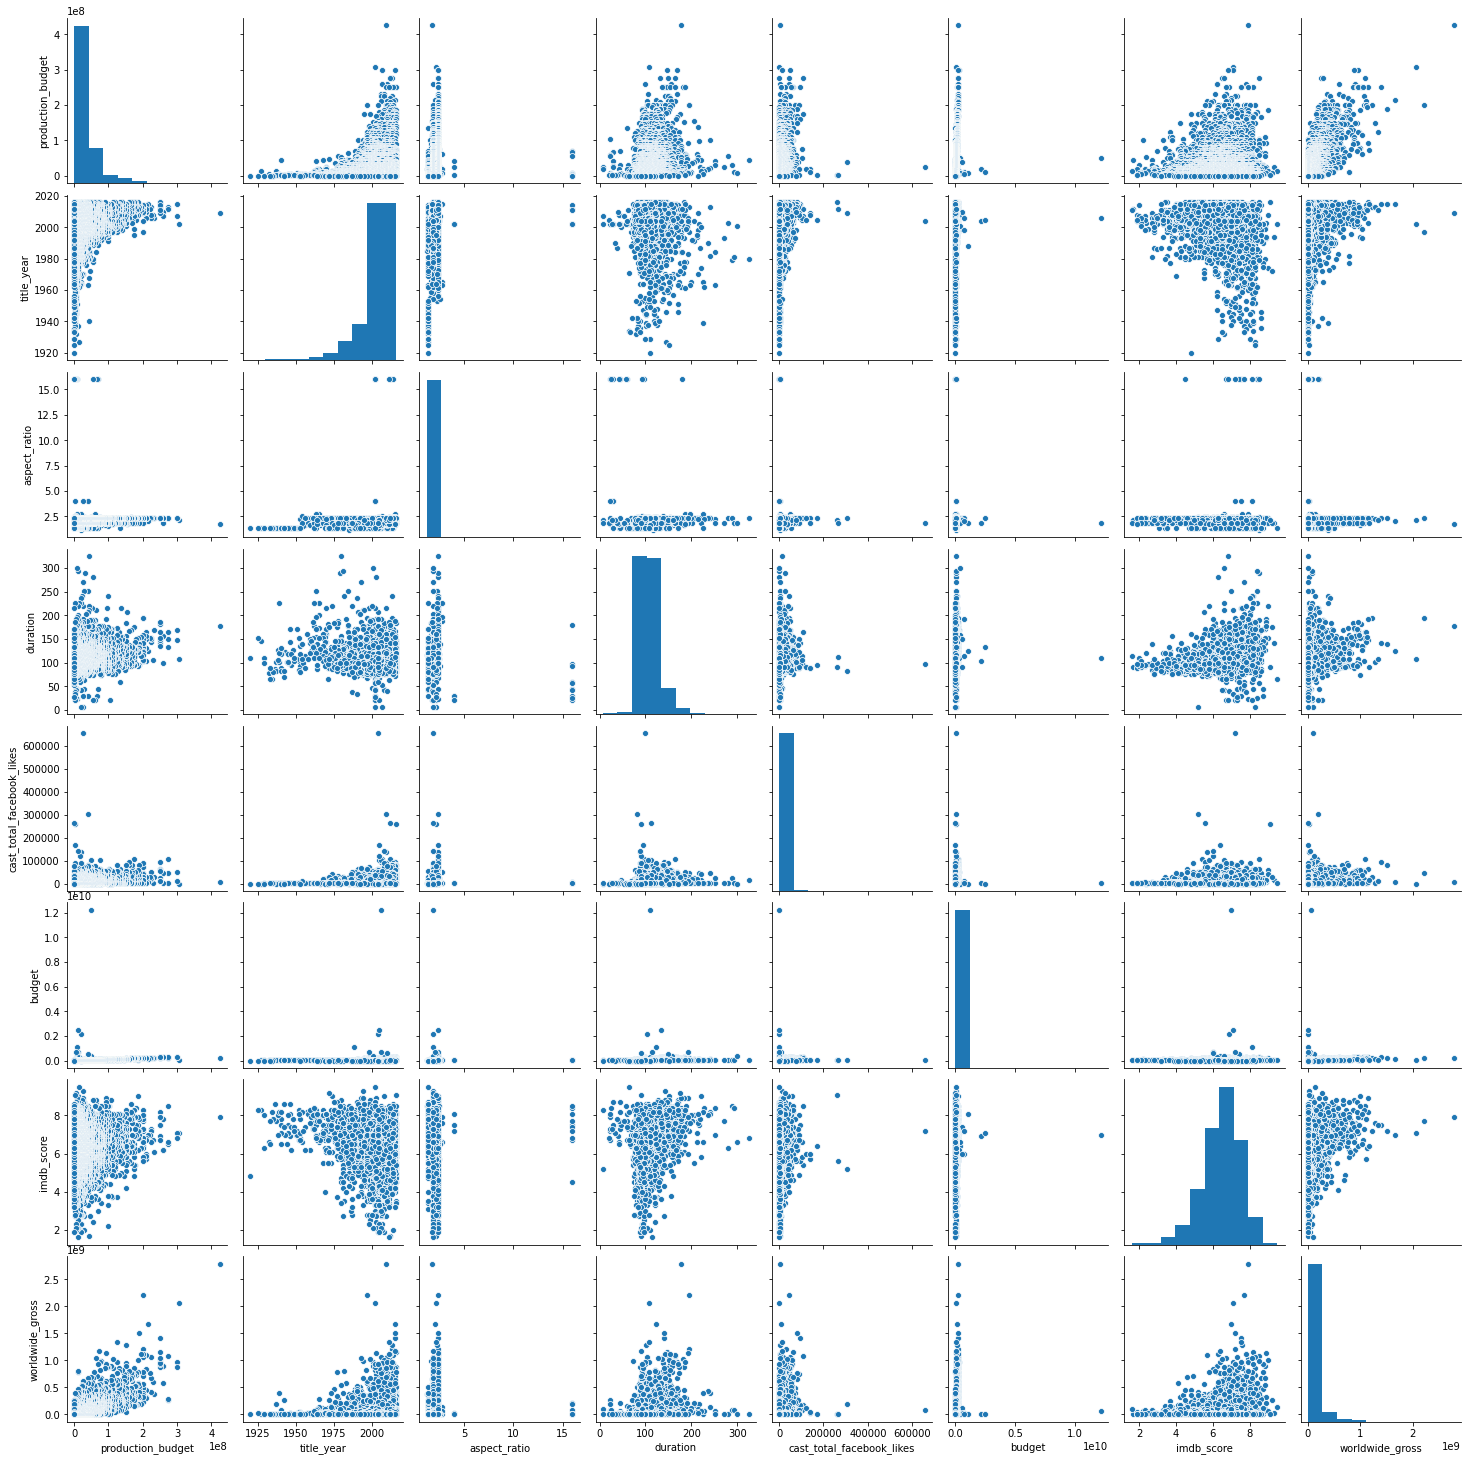

In [12]:
import seaborn as sns
z = pd.concat([X,y],axis=1)
sns.pairplot(z)

* Puede que en el gráfico anterior no se logre apreciar totalmente la distribucion de la informacion en el dataframe
* Para poder hacer esto realizamos una segmentacion del la informacion en grupos, en este caso 8 clases
* Concatenamos las 8 clases con el dataset original y hacemos el gráfico con Seaborn

In [0]:
clase = pd.cut(X['production_budget'],8).cat.codes.rename('clase')
z2 = pd.concat([X,clase],axis=1)

* Del siguiente grafico podemos notar algunas cosas:
  * production_budget permite segmentar de mejor manera los datos en relacion al worldwide_gross, de la misma manera podemos tomar como una feature importante el imdb_score puesto que tambien se segmenta de una buena manera y su distribucion tiene una ligera tendencia a la normalidad

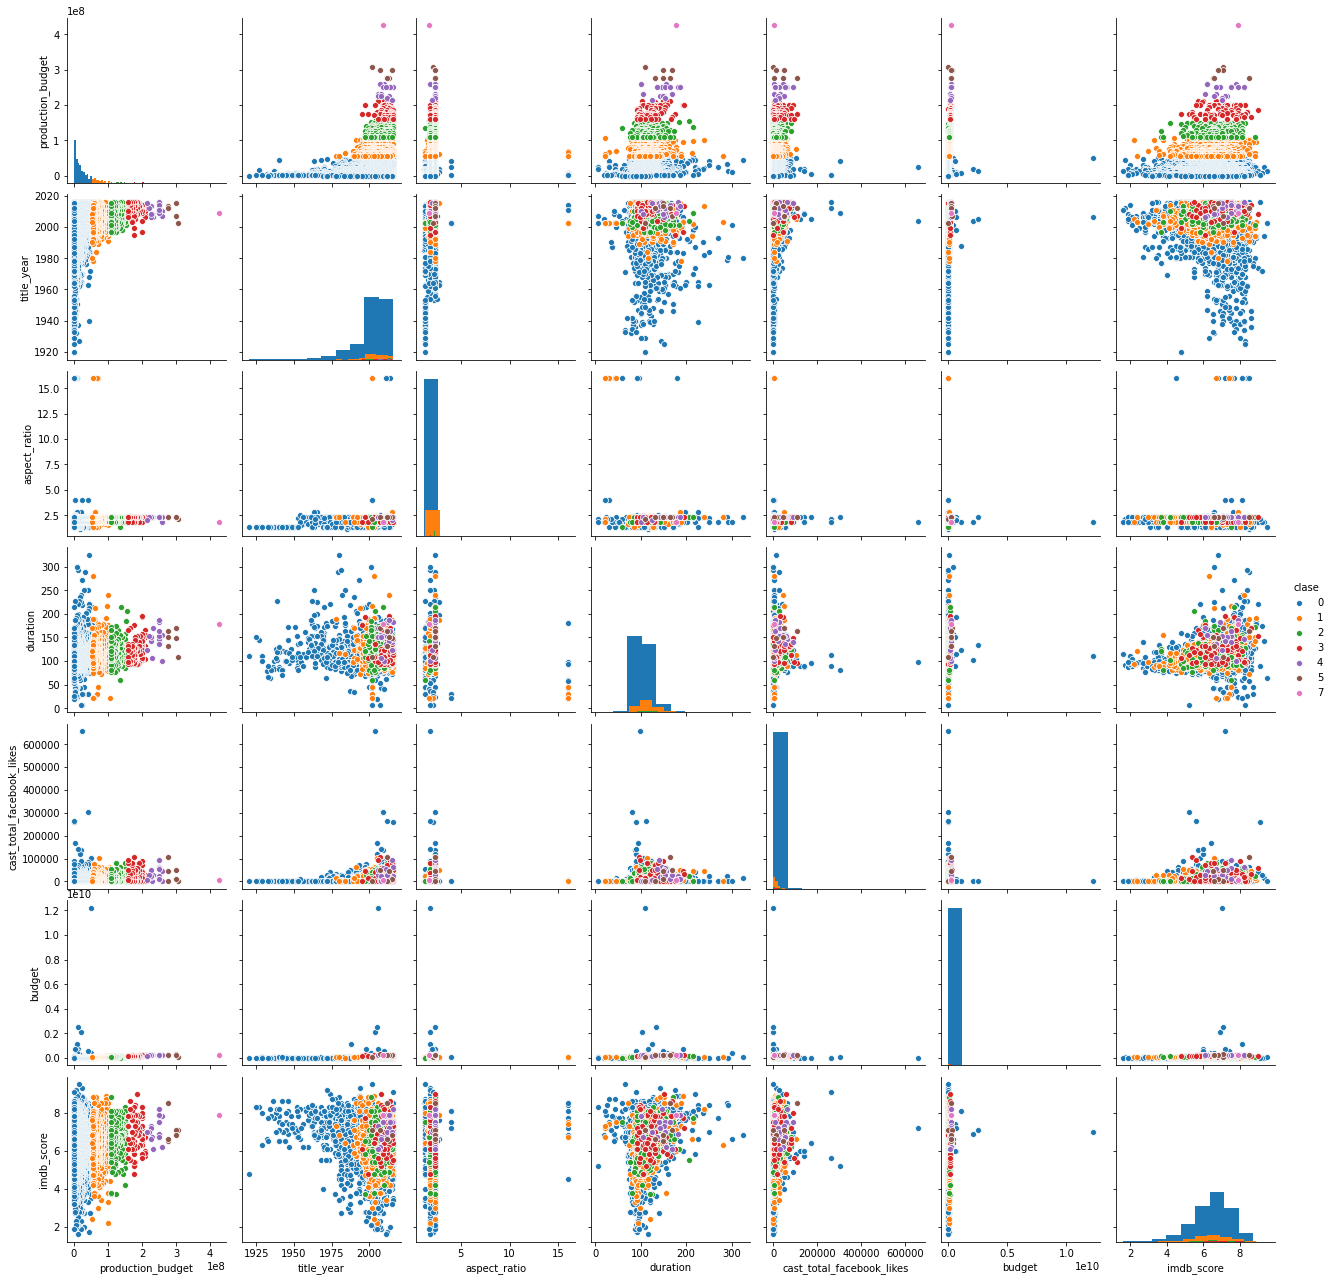

In [14]:
sns.pairplot(z2, hue = 'clase',diag_kind='hist')

* Otra forma de evaluar la relacion entre las features es a través de un heatmap, a continuacion podemos terminar de confirmar que existe una fuerte relacion entre production_budget y worldwide_gross

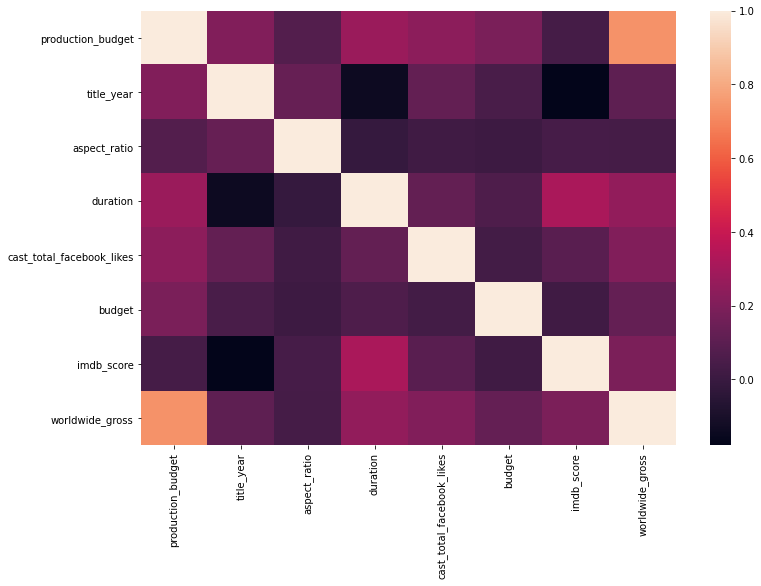

In [16]:
z3 = pd.concat([X,y],axis=1)
sns.heatmap(z3.corr())

# Seleccion automatica de features

* Aparte del proceso manual de revision y seleccion de features sklearn nos ofrece una forma de selección automática de features
  * Vamos a usar dos funcionalidades
    * SelectKBest realiza un analisis de cada feature y el aporte al modelo y selecciona las que considera como mejores
    * mutual_info_regression nos entrega la informacion utilizada para seleccionar las variables anteriores
    * Lo instanciamos y especificamos cuantos parametros queremos con k

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X,y)

SelectKBest(k=4, score_func=<function mutual_info_regression at 0x7f2250147840>)

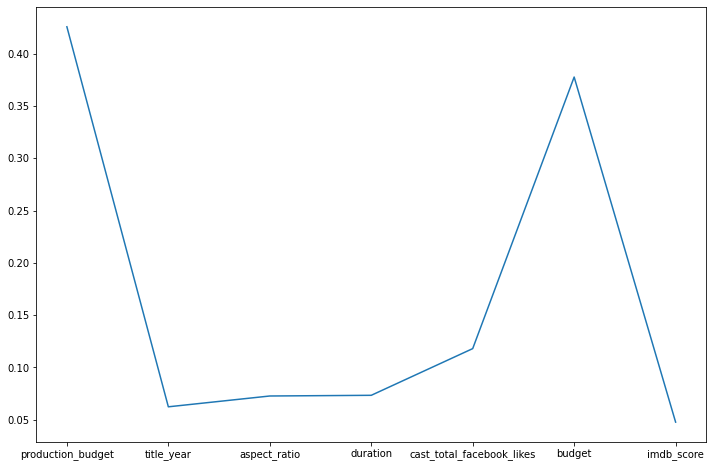

In [22]:
scores = selector.scores_
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(7),list(X.columns));


# Interpretacion del análisis univariante
* De acuerdo a lo que hemos visto hasta el momento podemos concluir que existen algunas features que son mas importantes para el modelo que otras
  * production_budget
  * title_year
  * duration
  * cast_total_facebook_likes
  * imbd_score

* Vamos a restringir a nuestro modelo con estas variables y entrenarlo para ver si mejora el rendimiento del mismo, para esto vamos a hacer dos modelos, uno con las features anteriores y otro con las mas relevantes dentro de este y comparar si existe una mejora de rendimiento


In [0]:
X2 = X[['production_budget','title_year','duration','cast_total_facebook_likes','imdb_score']]
X3 = X[['production_budget','cast_total_facebook_likes','imdb_score']]

* Ya que tenemos nuestros dataframes con la informacion relevante vamos a entrenar el modelo pero para esto primero tenemos que crear lo conjuntos de entrenamiento y prueba

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

* Dividimos los dataframes e instanciamos
  * Para evitar la aleatoriedad de los conjuntos de test y train les asignamos las columnas que ya habiamos seleccionado segun nuestro análisis previo

In [0]:
cols2 = ['production_budget','title_year','duration','cast_total_facebook_likes','imdb_score']
X2_train, X2_test, y2_train, y2_test = X_train[cols2], X_test[cols2], y_train, y_test

cols3 = ['production_budget','cast_total_facebook_likes','imdb_score']
X3_train, X3_test, y3_train, y3_test = X_train[cols3], X_test[cols3], y_train, y_test

* Para verificar que estamos usando la misma cantidad de datos pero limitando las columnas podemos ver el tamaño de los mismos

In [30]:
print(len(X_train))
print(len(X2_train))
print(len(X3_train))

3078
3078
3078


* Ahora que ya tenemos los tres conjuntos vamos a entrenar el modelo con los datos para observar si surgieron cambios

In [32]:
from sklearn.linear_model import Lasso

model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(X_train,y_train)
model2.fit(X2_train,y3_train)
model3.fit(X3_train,y3_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

* Una vez entrenado nuestro modelo vamos a revisar los scores de cada uno

In [33]:
print(model1.score(X_test,y_test))
print(model2.score(X2_test,y2_test))
print(model3.score(X3_test,y3_test))

0.600921913735581
0.6012407554822563
0.6010562209658489


* Con esto concluimos que el problema de rendimiento de nuestro modelo no viene dado por el exceso de features ya que los tres modelos arrojaron resultados muy similares, al tener pocas features como base se explica el porqué de este comportamiento, sin embargo el proceso es muy iterativo y hay que probar todas las soluciones posibles